# Predicting the Genre of a Movie
Natalie Agudo nsa348, Elizabeth Pipes elp343

    The aim of our project is to create an algorithm that is able to predict whether the genre of a movie is Romance or Action based on a few given variables. Our team built a simple classifier that predicts if a movie is Romance or Action based on the frequency of specific words from the movie scripts. The words we chose were "love", "shot", and "danger." We chose these words because we think these words could belong in an either a Romance or Action movie. This classifier is helpful when analyzing data because it faciliates our process of looking for either a romance or action movie. Our classifier shows how words used in a script are reflective of the kind of movie to expect.
    We began exploring our training dataset by scanning through the names(movies) list and picking out several words we felt were defining of either a romance or action movie. Then we made several scatterplots with one romance and one action word to see how they would compare against each other. Our three data visualizations included "shot" vs "love", "dark" vs "honey" and "danger" vs "hug". Additionally, we also plotted the word "love" against a general word like "the" to measure the frequency we should use for freq_love later on in the classifier. 
    Next we created our "simple" classifier (named simple_classifer) that would determine which genre a movie belonged to. Our first if statement says that if the frequency of the word "love" is greater than 0.005, then that movie will be labeled as "romance". However, if that's not true and the frequence of the word "danger" is greater than 0.0005, then that movie will be labeled as "action". If neither of the two previous statements apply, than the second else-if statement says that if the frequency of "love" is greater than the frequency of "shot" then that movie will be labeled "romance". Finally, if the movie has passed through and still not been labeled, the last else statement says it will just be labeled as "action". 
    The two metrics we used to assess our classifier were compute_accuracy and true positive rate. The first one took our predicted labels of what the genre would be and compared them against the actual labels from the data set, all of this over the amount of the actual labels. With this compute_accuracy, our prediction accuracy is 72%. Our second metric contains a while loop, which says if the actual label is "romance" and the predicted label is "romance" as well, then the true positive is 1. The true positive rate is then taking this and dividing by the total number of actual 1's from the "romance" genre. This metric gave us an accuracy rate of 80%.
    
    Our team uses the kNN function to measure the distance between the new data point and each training data point. Choosing the right k is important as it produces the most accurate predictions. Through using different values of k we can find a value of k that would be the most and least accurate. We then measure the error of k through different training/test data sets as opposed to limiting our error to the same training and test data. We split our data into two equal training and test data. We then computed the accuracy of k by using different values of k in our line of codes. After computing the accuracy of k through 8 integers, we found the value for k=6 computed the most accuracy. The performance of the knn classifier in terms of our second metric is good due to both accuracies being similar. Our second metric checks the number of data points with predicted labels equal to 1 and the true labels equal to 1.  Our classifier compares to our knn classifier and our two metrics as it measures the accuracy of our predicted genre labels and the true positive rate of the actual labels and the predicted labels. Our knn classifier aims to show the proportion of examples that are labeled correctly.
## References (if any)
Professor Sondjaja's help during office hours

Class Demonstrations and Lectures

## Codes

In [0]:
# Your codes go here ...

In [1]:
library('dplyr')
library('ggplot2')
library('class')


Attaching package: ‘dplyr’



The following objects are masked from ‘package:stats’:

    filter, lag



The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [41]:
movies <- read.csv('movies.csv')
stem <- read.csv('stem.csv')

In [42]:
# splitting into training and test data

# TO DO 
# CHANGE THE NUMBER OF TRAINING DATA to be something that is divisible by 3 (why? this will make our life easier in Task 3)

# total number of rows in movies
num_rows <- dim(movies)[1]
# specify the proportion of the data that is used for training
training_proportion <- 2/3   # later you can change 2/3 into any number between 0 and 1
num_training <- round( training_proportion * num_rows )   # round the number to the nearest integer

# shuffle all the 242 rows
shuffled_row_indices <- sample( 1:num_rows, num_rows, replace = FALSE)

# row indices for the training data is the first num_training elements of the shuffled row indices
# row indices for the test data is the remaining elements of the shuffled row indices
training_row_indices <- shuffled_row_indices[ 1:num_training ]
test_row_indices <- shuffled_row_indices[ (num_training+1):num_rows ]


# split the movies dataframe
training <- movies[ training_row_indices,  ]
test <- movies[ test_row_indices, ]

In [43]:
head (movies)

Title Genre Year Rating X..Votes X..Words i the to a ⋯ foster pub vegetarian garrison grammoo chimney bikini richter psychopath fling 
 
 the terminator action 1984 8.1 183538 1849 0.04002163 0.04380746 0.02541915 0.02487831 ⋯ 0 0 0 0 0 0 0 0 0.000000000 0 
 batman action 1989 7.6 112731 2836 0.05148096 0.03385049 0.02397743 0.02820875 ⋯ 0 0 0 0 0 0 0 0 0.000000000 0 
 tomorrow never dies action 1997 6.4 47198 4215 0.02870700 0.05432977 0.03036773 0.02182681 ⋯ 0 0 0 0 0 0 0 0 0.000237248 0 
 batman forever action 1995 5.4 77223 3032 0.03660950 0.04221636 0.02044855 0.03100264 ⋯ 0 0 0 0 0 0 0 0 0.000000000 0 
 supergirl action 1984 4.1 6576 3842 0.04190526 0.03227486 0.02889120 0.02628839 ⋯ 0 0 0 0 0 0 0 0 0.000000000 0 
 the avengers action 1998 3.4 21519 3586 0.03680982 0.03346347 0.02481874 0.02900167 ⋯ 0 0 0 0 0 0 0 0 0.000278862 0

In [44]:
#Data exploration and feature selection 

#Words chosen for romance movie: love, kiss, date, happiest, partnership
#Words chosen for action movie: shot,danger,dark, smoke, steal 


In [45]:
names(movies)

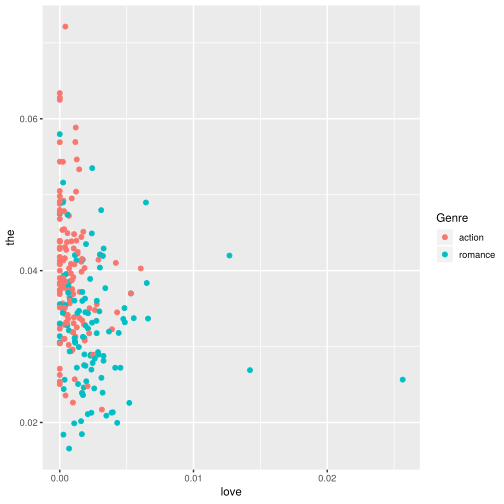

In [46]:
ggplot(movies, aes(x = love, y = the, color = Genre)) + geom_point(position= "jitter")

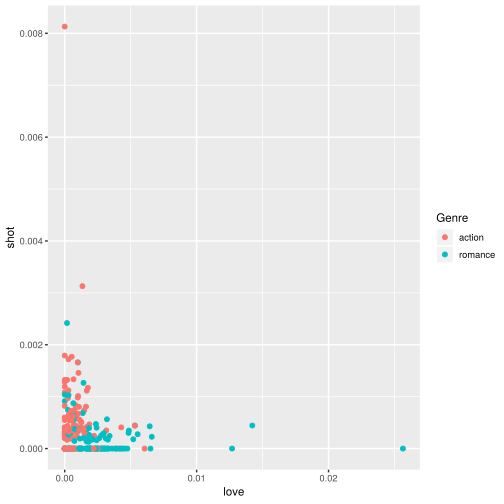

In [47]:
ggplot(movies, aes(x = love, y = shot, color = Genre)) + geom_point(position= "jitter")

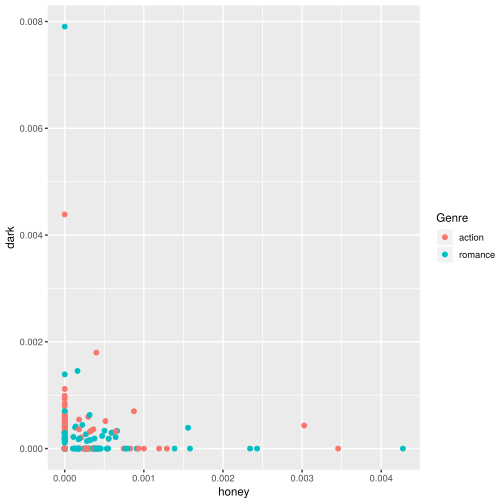

In [48]:
ggplot(movies, aes(x = honey, y = dark, color = Genre)) + geom_point(position= "jitter")

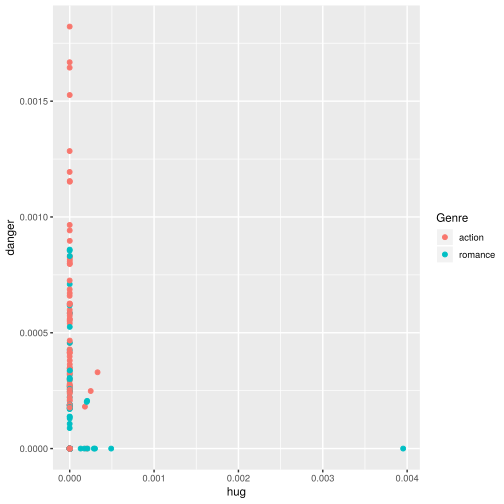

In [49]:
ggplot (movies, aes (y = danger, x = hug, color = Genre)) + geom_point(position = "jitter")

In [50]:
#Development of our own classifier

In [51]:
simpleclassifier<-function(freq_love, freq_shot, freq_danger) {
    if (freq_love > 0.005 ){
        label <- "romance"
    }
    else if (freq_danger > 0.0005){
        label <- "action"
    } 
    else if (freq_love > freq_shot){
        label <- "romance"
    }
    else {
        label <- "action"
    }
    
    label
}

In [52]:
#Assessment of our own classifier

In [53]:
test$love[1]
test$shot[1]
test$danger[1]

0.001789709

0

0

In [54]:
# simpleclassifier(test$love[1], test$shot[1], test$danger[1])

In [55]:
# simpleclassifier(test$love[5], test$shot[5], test$danger[5])

In [56]:
head(test, 2)

Title Genre Year Rating X..Votes X..Words i the to a ⋯ foster pub vegetarian garrison grammoo chimney bikini richter psychopath fling 
 
 109 birthday girl romance 2001 6.0 13497 2235 0.04340045 0.02460850 0.03176734 0.01968680 ⋯ 0 0 0 0 0 0 0 0 0 0 
 169 the french connection action 1971 7.9 34062 1115 0.02062780 0.06278027 0.01524664 0.04484305 ⋯ 0 0 0 0 0 0 0 0 0 0

In [57]:
test$to[2]

0.015246637

In [58]:
dim(test)

81 
 5006

In [59]:
romance_action <- data.frame (predicted_genre = double(81))
num_simulations <- 81
count <- 1

while (count <= num_simulations){
    romance_action$predicted_genre[count] <- simpleclassifier (test$love[count], test$shot[count], test$danger[count])
    
    count <- count + 1
}


In [60]:
head (romance_action)

predicted_genre 
 
 romance 
 action 
 romance 
 action 
 romance 
 action

In [61]:
# accuracy 
compute_accuracy <- function(  predicted_labels, actual_labels ){
    
    accuracy<- sum(actual_labels == predicted_labels)/length(actual_labels)
    
    
    accuracy
}

In [62]:


compute_accuracy(romance_action$predicted_genre, test$Genre)

0.728395061728395

In [63]:
head(test, 5)
head(romance_action, 5)

Title Genre Year Rating X..Votes X..Words i the to a ⋯ foster pub vegetarian garrison grammoo chimney bikini richter psychopath fling 
 
 109 birthday girl romance 2001 6.0 13497 2235 0.04340045 0.02460850 0.03176734 0.01968680 ⋯ 0 0 0 0 0 0 0 0 0 0 
 169 the french connection action 1971 7.9 34062 1115 0.02062780 0.06278027 0.01524664 0.04484305 ⋯ 0 0 0 0 0 0 0 0 0 0 
 82 mrs brown romance 1997 7.2 5701 4077 0.03728232 0.04145205 0.03335786 0.01888644 ⋯ 0 0 0 0 0 0 0 0 0 0 
 207 x-men action 2000 7.4 122149 1736 0.03168203 0.04493088 0.04089862 0.02016129 ⋯ 0 0 0 0 0 0 0 0 0 0 
 33 braveheart action 1995 8.4 245652 2895 0.03799655 0.03557858 0.03281520 0.02521589 ⋯ 0 0 0 0 0 0 0 0 0 0

predicted_genre 
 
 romance 
 action 
 romance 
 action 
 romance

In [64]:
# true positive rate
compute_tpr <- function( actual_labels, predicted_labels){
    
    total_num_actual_ones <- sum( test$Genre == "romance" )
    
    tp <- 0
    count <- 1
    while( count <= length(actual_labels) ){
        
        if( actual_labels[count] == "romance"  && predicted_labels[count] == "romance"   ){
            tp <- tp + 1
        }
        
        count <- count + 1
    }
    
    
    tpr <- tp / total_num_actual_ones
    
    tpr
}

In [65]:
compute_tpr(romance_action$predicted_genre, test$Genre)

0.828571428571429

In [66]:
# kNN
k <- 5
indices_of_knn <- order (romance_action$predicted_genre) [1:k]
indices_of_knn <- test$Genre[indices_of_knn]
indices_of_knn

action 
 action 
 action 
 action 
 action 
 

 
 
 Levels :
 
 
 'action' 
 'romance'

In [67]:
feature_col_1 <- match("love", names(training))
feature_col_1

113

In [68]:
feature_col_2<- match("shot", names(training))
feature_col_2

394

In [69]:
feature_col_3<-match("danger", names(training))
feature_col_3

529

In [88]:
predicted_labels_1<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=1)
compute_accuracy(test$Genre, predicted_labels_1)       

0.62962962962963

In [89]:
predicted_labels_2<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=2)
compute_accuracy(test$Genre, predicted_labels_2) 

0.691358024691358

In [90]:
predicted_labels_3<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=3)
compute_accuracy(test$Genre, predicted_labels_3) 

0.679012345679012

In [91]:
predicted_labels_4<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=4)
compute_accuracy(test$Genre, predicted_labels_4) 

0.654320987654321

In [92]:
predicted_labels_5<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=5)
compute_accuracy(test$Genre, predicted_labels_5) 

0.703703703703704

In [93]:
predicted_labels_6<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=6)
compute_accuracy(test$Genre, predicted_labels_6) 

0.716049382716049

In [94]:
predicted_labels_7<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=7)
compute_accuracy(test$Genre, predicted_labels_7) 

0.679012345679012

In [95]:
predicted_labels_8<-knn(training[, 113:529], test[, 113:529], factor(training$Genre), k=4)
compute_accuracy(test$Genre, predicted_labels_8) 

0.679012345679012